# Multi LSTM Model with Pre-Trained Word Embedding from CSV
In this notebook we first look at the dataset, prepare it then we use [nnlm-en-dim128](https://tfhub.dev/google/nnlm-en-dim128/2) from Tensorhub, which is a token based text embedding trained on English Google News 200B corpus.

In [ ]:
#get data from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Libraries
import pandas as pd
import numpy as np
from collections import Counter
import tensorflow as tf
from tensorflow.keras import layers

# load numpy array from csv file
from numpy import loadtxt

#plotting performance
import matplotlib.pyplot as plt

## Load prepared dataset

In [ ]:
# load array
X = loadtxt('/content/drive/MyDrive/data/X_pte.csv', delimiter=',')
y = loadtxt('/content/drive/MyDrive/data/y_pte.csv', delimiter=',')

# print the array
print(X)
print(y)

[[-0.32050174  0.09988437  0.03830742 ...  0.0879824   0.02484336
   0.02915411]
 [-0.06586279 -0.02357843 -0.00417653 ... -0.08221821  0.27421817
  -0.23732811]
 [ 0.0011019   0.17852448 -0.10262536 ... -0.14002527  0.28217351
   0.00974867]
 ...
 [ 0.02218024  0.06301074  0.07259413 ... -0.20361364  0.11391133
   0.02412249]
 [-0.17913507  0.1179746  -0.0974484  ...  0.05386907  0.12391619
   0.02870932]
 [-0.1560052   0.09624466 -0.09733319 ... -0.07222934 -0.05646805
   0.05502828]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Split sample into 80% training, 10% test & 10% validation datasets
Next, 10% of the data was split off for testting, 10% for validation and the remaining 80% was used as for training data.

In [ ]:
from sklearn.model_selection import train_test_split

#first split data for training and test data (90:10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1111, random_state=42)

print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Validation data shape:", X_val.shape)
print("Validation labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)


Training data shape: (11977, 128)
Training labels shape: (11977, 76)
Validation data shape: (1497, 128)
Validation labels shape: (11977, 76)
Test data shape: (1498, 128)
Test labels shape: (1498, 76)


In [ ]:
max_words = 14953

In [ ]:
seq_len = 128 #255

## Multi-layer LSTM Model

In [ ]:
ptwe_multi_LSTM_model = tf.keras.Sequential()

In [ ]:
ptwe_multi_LSTM_model.add(layers.Embedding(input_dim=max_words, 
                           output_dim=82,
                           input_length=seq_len))

In [ ]:
ptwe_multi_LSTM_model.add(layers.LSTM(82, return_sequences=True))

In [ ]:
ptwe_multi_LSTM_model.add(layers.LSTM(82))

In [ ]:
ptwe_multi_LSTM_model.add(layers.Dense(y.shape[1], activation='softmax'))

In [ ]:
ptwe_multi_LSTM_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [ ]:
ptwe_multi_LSTM_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 128, 82)           1226146   
                                                                 
 lstm (LSTM)                 (None, 128, 82)           54120     
                                                                 
 lstm_1 (LSTM)               (None, 82)                54120     
                                                                 
 dense (Dense)               (None, 76)                6308      
                                                                 
Total params: 1,340,694
Trainable params: 1,340,694
Non-trainable params: 0
_________________________________________________________________


In [ ]:
ptwe_multi_LSTM_history = ptwe_multi_LSTM_model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=10)

Epoch 1/10
375/375 [==============================] - 106s 270ms/step - loss: 3.3437 - accuracy: 0.0942 - val_loss: 3.2867 - val_accuracy: 0.0762
Epoch 2/10
375/375 [==============================] - 94s 252ms/step - loss: 3.2847 - accuracy: 0.0937 - val_loss: 3.2821 - val_accuracy: 0.0955
Epoch 3/10
375/375 [==============================] - 99s 264ms/step - loss: 3.2808 - accuracy: 0.0973 - val_loss: 3.2838 - val_accuracy: 0.0762
Epoch 4/10
375/375 [==============================] - 95s 253ms/step - loss: 3.2821 - accuracy: 0.0964 - val_loss: 3.2799 - val_accuracy: 0.0955
Epoch 5/10
375/375 [==============================] - 99s 265ms/step - loss: 3.2784 - accuracy: 0.0969 - val_loss: 3.2790 - val_accuracy: 0.0762
Epoch 6/10
375/375 [==============================] - 95s 254ms/step - loss: 3.2787 - accuracy: 0.0917 - val_loss: 3.2786 - val_accuracy: 0.0955
Epoch 7/10
375/375 [==============================] - 97s 258ms/step - loss: 3.2765 - accuracy: 0.0964 - val_loss: 3.2799 - val_a

In [ ]:
loss_and_metrics = ptwe_multi_LSTM_model.evaluate(X_test, y_test, verbose=2)
print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

47/47 - 6s - loss: 3.2605 - accuracy: 0.0808 - 6s/epoch - 133ms/step
Test Loss 3.2605202198028564
Test Accuracy 0.08077436685562134


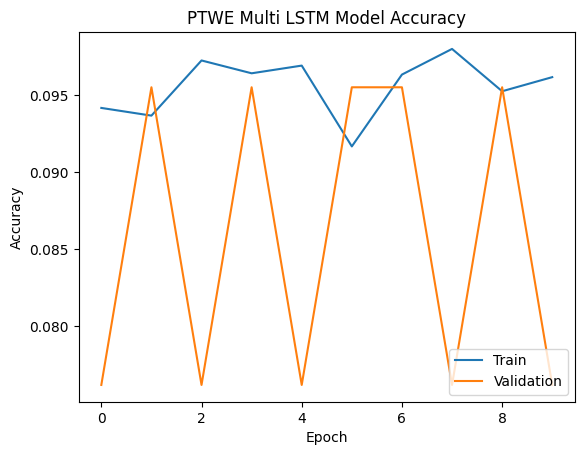

In [ ]:
# Plot training & validation accuracy values
plt.plot(ptwe_multi_LSTM_history.history['accuracy'])
plt.plot(ptwe_multi_LSTM_history.history['val_accuracy'])
plt.title('PTWE Multi LSTM Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

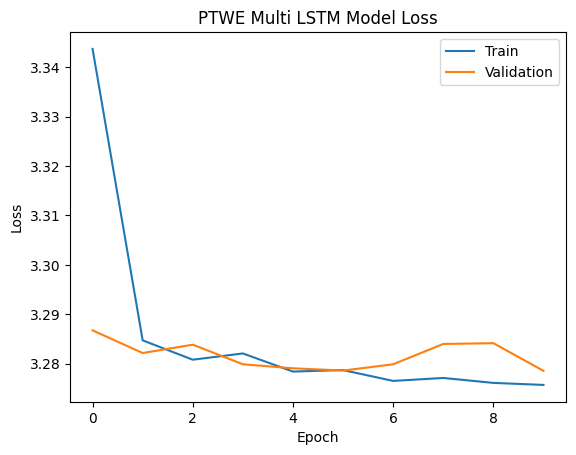

In [ ]:
# Plot training & validation loss values
plt.plot(ptwe_multi_LSTM_history.history['loss'])
plt.plot(ptwe_multi_LSTM_history.history['val_loss'])
plt.title('PTWE Multi LSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
ptwe_multi_LSTM_model.save('/content/drive/MyDrive/data/ptwe_multi_lstm_model')

## Part 1 News Article Section Prediction Task Checklist

01. Basic RNN model
02. Single Layer LSTM
03. Multi-Layer LSTM
04. On-the-fly Embeddings
05. Pre-trained Embeddings
06. Bag of Words
07. NNs with multiple and heterogeneous kernel sizes
08. NNs with multiple and heterogeneous kernel sizes with LSTM
09. Random Forests Model
10. Section Heading Predictor
11. Save & Load best on-the-fly embedding model
12. Save & Load best pretrained embedding model

Compare LSTM and Basic RNN models

Compare a single layer LSTM implementation to multi-layer LSTM implementations

Compare Embeddings learned on the fly to pre-trained word embedding available from the Tensorflow Hub or HuggingFace.

Compare embeddings based approaches to a more traditional text encoding approach.

Use of CNNs with multiple and heterogeneous kernel sizes as an alternative to an LSTM solution

Use of CNNs with multiple and heterogeneous kernel sizes as an additional
layer before a LSTM solution

Compare the performance of one of your best performing neural models against the non-neural method (e.g Random Forests).

build a version of a model that uses both the text of an article and the web title to predict the section heading

Save best model based on non pre-trained embeddings

Save best model based on pre-trained embeddings

A link to these best performing models should be included in your submission report and a
demonstration notebook (described later) should be capable of loading these from the web as
well as your snapshot of test data, and demonstrating your test results with these models. You
will also be using these saved models in Parts 2 below for training.

## Part 2 Transfer Learning Checklist

https://www.kaggle.com/datasets/yufengdev/bbc-fulltext-and-category

create a new model based on predicting the topic based on the article text

Build and evaluate models based on your best 2 models obtained from part 1 using a Transfer Learning method, but also build models from scratch

The models you build should allow some
amount of like to like comparison between the newly created models and the models imported
from Part A, and should where appropriate demonstrate approaches to Transfer Learning and
good practice in model design.

Save the best performing resulting Transfer Learning and ‘From Scratch’ models for this
dataset. Links to these models need to be supplied as part of your submission.

Your evaluation of the models should be based minimally on training and validation error and any other metrics
or methods you think appropriate. Again, the demo notebook should be capable of downloading
the models and your test data and automatically demonstrating the calculation of test value
results.

## Part 3 Writing your own news article

write a few sentences of a news article for the two most frequent genre / section types in your dataset.

build a generative model based on this dataset that outputs script excerpts that
are 10 turns

core model should be based on the use of LSTMs, but beyond this you are free to explore
whatever architecture and hyper-parameter variants that you find results in the best
performance in the language generation task

Report model performance in terms of perplexity and any other metrics or methods you finappropriate.

report of quality that is worthy for submission for publication at a national conference